#딥러닝 16강 RNN


## 2. 간단한 RNN 실습

###(1) Keras에서 신경망 모델
- Sequential 클래스 객체인 모델을 선택
 - 일렬로 신경망을 쌓아가는 형태의 모델
 - Keras의 모델은 신경망 계층(layer)들을 쌓는 방법을 지정한다.
 - 기본적인 형태는 대부분 Sequential 모델을 사용하고, 복잡한 형태의 경우 Model 클래스를 사용할 수 있다.
- add 메서드로 Sequential 모델 안에 다양한 레이어 추가
- compile 메서드로 목적함수 및 최적화 방법 지정
 - 학습 과정에 관련된 정보들을 설정
 - 예를 들어 비용 함수나 최적화 방법 등
- fit 메서드로 가중치 계산
 - 실제 트레이닝을 실행


### (2) 전체학습코드
RNN을 사용하여 sine 함수를 학습하고 예측하는 실습

전체 코드를 통해 구성을 본 다음 부분별로 상세하게 분석해보자.

In [1]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, TimeDistributed
from keras.utils import np_utils

# 2. 데이터 생성 및 전처리
data = "easyrnn"

char_set = list(set(data))  
char_dic = {w: i for i, w in enumerate(char_set)}

x_str = data[:-1]
y_str = data[1:]

input_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print('입력 : ',x_str, '출력 : ',y_str)

x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index

# One-hot 인코딩
x = np_utils.to_categorical(x, num_classes=num_classes)
print('입력onehot\n',x)
# reshape X to be [samples, time steps, features(input_dim)] 3차원 tensor 형태
x = np.reshape(x, (-1, len(x), input_dim))
print('입력onehot_3차원\n',x)
print('입력 shape : ', x.shape)

# One-hot 인코딩
y = np_utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), input_dim))
print('출력 shape : ', y.shape)

# 3. 신경망 정의
model = Sequential()
model.add(LSTM(num_classes, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add((Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

# 4. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam', metrics=['accuracy'])

# 5. 모델 학습
model.fit(x, y, epochs=500) # , steps_per_epoch=100

# 6. 모델 TEST
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print('예측값\n', prediction)
    
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print('입력')
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print('예측')
    print(index, ''.join(result))


입력 :  easyrn 출력 :  asyrnn
입력onehot
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
입력onehot_3차원
 [[[0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1.]]]
입력 shape :  (1, 6, 6)
출력 shape :  (1, 6, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 6)              312       
_________________________________________________________________
time_distributed (TimeDistri (None, 6, 6)              42        
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6)              42        
_________________________________________________________________
activation (Activation)      (None, 6, 6)              0         
Total params: 396
Trainable par

#### 1) 필요한 library import
- np : data처리를 위한 numpy 모듈을 불러온다.
- Sequential : 순차형 모델 생성에 필요한 모듈
- Dense : 입출력 연결
- Activation : 활성함수 모듈
- CuDNNLSTM : GPU사용 LSTM 모델
- np_utils : one hot 인코딩 모듈

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.utils import np_utils

#### 2) 데이터 생성 및 전처리

In [3]:
# 학습 데이터 (샘플이 하나 뿐이므로 제대로 학습하지 않고 overfit될 것이지만, 여기에서는 케라스를 통한 RNN 실행 코드만 확인하자)

data = "iloveyou"

In [4]:
print(set(data))

{'l', 'v', 'i', 'e', 'y', 'u', 'o'}


In [5]:
print(list(data))

['i', 'l', 'o', 'v', 'e', 'y', 'o', 'u']


In [6]:
# list와 set활용 data의 unique값 추출
char_set = list(set(data))  # set 자료형은 중복을 허용하지않고, 순서가 없다.
print(char_set)

['l', 'v', 'i', 'e', 'y', 'u', 'o']


In [7]:
# enumerate 활용 각 str의 index 추출
char_dic = {w: i for i, w in enumerate(char_set)}
print(char_dic)

{'l': 0, 'v': 1, 'i': 2, 'e': 3, 'y': 4, 'u': 5, 'o': 6}


In [8]:
# 입력과 출력 data 설정
x_str = data[:-1]
y_str = data[1:]
print(x_str)
print(y_str)

iloveyo
loveyou


In [9]:
input_dim = len(x_str) # x 벡터의 크기
print('input_dim : ', input_dim)
timesteps = len(y_str) # 순서열의 길이
print('timesteps : ', timesteps)
num_classes = len(char_set) # 출력 클래스
print('num_classes : ', num_classes)


input_dim :  7
timesteps :  7
num_classes :  7


In [10]:
x = [char_dic[c] for c in x_str]  # char to index
print(x)
y = [char_dic[c] for c in y_str]  # char to index
print(y)

[2, 0, 6, 1, 3, 4, 6]
[0, 6, 1, 3, 4, 6, 5]


- Keras에서 RNN을 사용하려면 입력데이터(자료의수, 순서열의길이, x벡터의 크기)는 ndim=3인 3차원 tensor 형태이어야 한다

In [11]:
# One-hot 인코딩
x = np_utils.to_categorical(x, num_classes=num_classes)
print('입력onehot\n',x)
# reshape X to be [samples, time steps, features(input_dim)] 3차원 tensor 형태
x = np.reshape(x, (-1, len(x), input_dim))
print('입력onehot_3차원\n',x)
print('입력 shape : ', x.shape)

입력onehot
 [[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
입력onehot_3차원
 [[[0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
입력 shape :  (1, 7, 7)


In [12]:
# One-hot 인코딩
y = np_utils.to_categorical(y, num_classes=num_classes)
print('출력onehot\n', y)
# time steps
y = np.reshape(y, (-1, len(y), input_dim))
print('출력onehot_3차원\n',y)
print('출력 shape : ', y.shape)

출력onehot
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]]
출력onehot_3차원
 [[[1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0.]]]
출력 shape :  (1, 7, 7)


#### 3) 신경망 정의
- 심층 신경망을 만들기위해 Sequential 객체인 model을 정의하고 층층이 쌓는다.
- return_sequences=True는 모든 입력에 대해 출력 순서열 중 마지막 값만 출력하는 것이아니라 전체 순서열을 3차원 텐서 형태로 출력하여 sequence-to-sequence 문제로 풀 수 있다. 다만 입력 순서열과 출력 출력 순서열의 크기는 같아야 한다.
- 출력마다 Dense를 반복해서 덧붙여야 하므로 TimeDistributed를 사용하여, 3차원 teonsor 입력 받을 수 있게 확장한다

In [13]:
model = Sequential()
model.add(LSTM(num_classes, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary() # 만들어진 구조 요약

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 7)              420       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 7, 7)              56        
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7)              0         
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________


In [14]:
# model에 포함된 각 layer별 shape 확인
for l in model.layers :
  print('input shape:', l.input_shape)
  print('output shape:', l.output_shape)

input shape: (None, 7, 7)
output shape: (None, 7, 7)
input shape: (None, 7, 7)
output shape: (None, 7, 7)
input shape: (None, 7, 7)
output shape: (None, 7, 7)


#### 4) 모델 학습과정 설정
- 모델의 Loss function으로 멀티 레이블 예측에 적합한 
  범주형 크로스 엔트로피 함수를 사용한다.
- 최적화방법으로 Adam Optimizer를 사용, Learning rate는 0.001로 default다.
- 모델 평가 항목(Metric)으로 Accuracy(Y값을 정확히 예측한 비율)를 사용한다.

In [15]:
# model에 사용되는 학습 관련 파라미터 및 정보 설정

model.compile(loss='categorical_crossentropy',
              optimizer='Adam', metrics=['accuracy'])


#### 5) 모델학습
- 모델을 학습시키기 위해서 model.fit 함수를 사용한다.
- 모델에 학습에 사용할 데이터로 학습 데이터 셋(Train)을 지정한다.
- Epochs 학습횟수 지정
- verbose의 세가지 옵션(0: 과정 생략, 1: 과정 보기, 2:횟수와 loss만 확인), default = 1

In [16]:
# 모델 트레이닝
model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.9541 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 1.9521 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 1.9502 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 1.9483 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 1.9464 - accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 1.9445 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 1.9426 - accuracy: 0.1429
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 1.9407 - accuracy: 0.1429
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 1.9389 - accuracy: 0.1429
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 1.9370 - accuracy: 0.1429
Epoch 

#### 6) 모델 TEST

In [17]:
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print('예측값\n ', prediction)
    
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print('입력')
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print('예측')
    print(index, ''.join(result))

예측값
  [[0.18603697 0.19012061 0.0932732  0.14779364 0.1322445  0.08134643
  0.16918458]
 [0.11159521 0.17313924 0.08070105 0.16007832 0.13073942 0.07066332
  0.27308345]
 [0.08587921 0.18112153 0.0830183  0.17662925 0.13311614 0.09629799
  0.24393763]
 [0.07476123 0.13714688 0.06577142 0.2139211  0.1227056  0.1350485
  0.25064525]
 [0.05307037 0.10526113 0.069782   0.12830321 0.16700682 0.15729809
  0.3192784 ]
 [0.02469616 0.04159041 0.03934617 0.09226017 0.16152811 0.22502053
  0.41555843]
 [0.02655316 0.0337025  0.03604965 0.09366612 0.15084602 0.44182795
  0.21735466]]
입력
[2 0 6 1 3 4 6] iloveyo
예측
[1 6 6 6 6 6 5] vooooou


## 3. 시계열데이터 single time point 예측 실습

### (1) 전체 학습코드

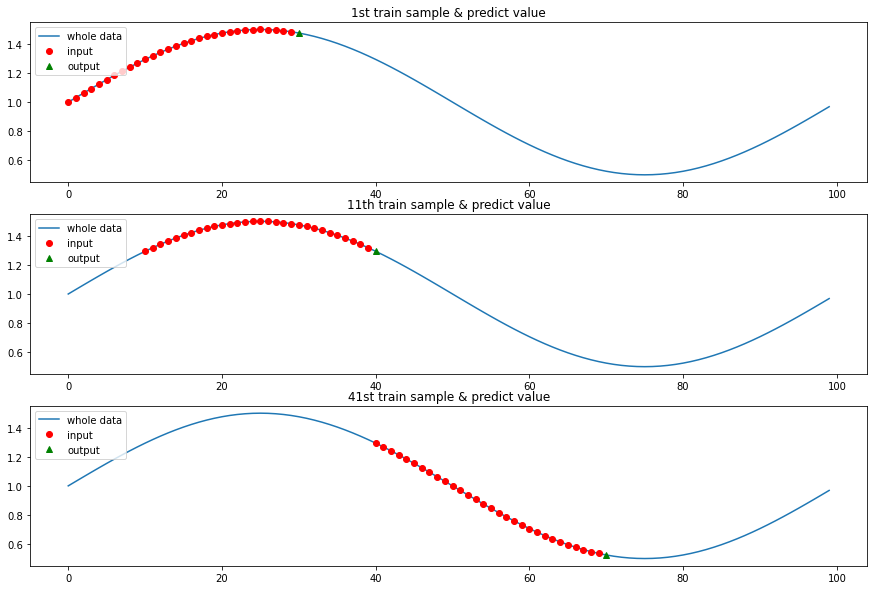

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


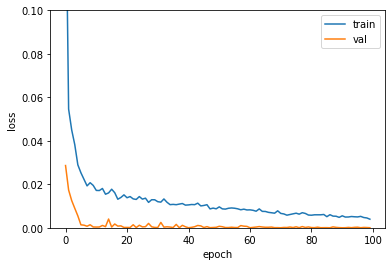

Train Loss:  5.2904608310200274e-05
Validataion Loss:  4.81237075291574e-05
Test Loss:  4.81237075291574e-05


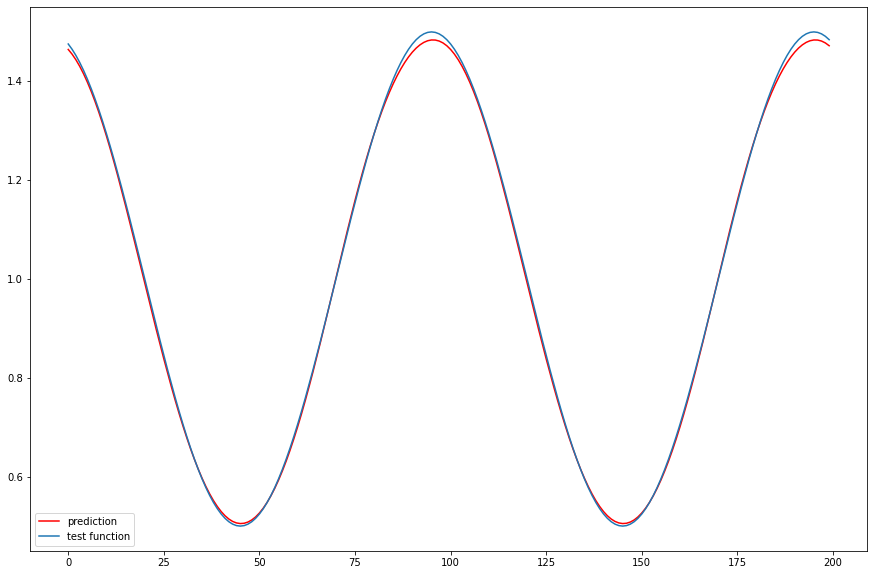

In [18]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 하이퍼 파라메터 설정
training_cnt = 100
batch_size = 32
num_classes = 1
time_shift = 30 # 30개의 연속된 값을 입력으로 하여 31번째 값을 추정


# 3. 데이터셋 생성
# sin 데이터 생성
sin_data = np.sin(np.arange(1500)*(2*np.pi*0.01))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0.5, 1.5))
sin_data = scaler.fit_transform(sin_data)

# 데이터 분리(training, validation, test)
train = sin_data[0:900]
val = sin_data[900:1200]
test = sin_data[1200:]

# 데이터셋 생성함수 
def create_dataset(sin_data, time_shift=1):
    dataX, dataY = [], []
    for i in range(len(sin_data)-time_shift):
        dataX.append(sin_data[i:(i+time_shift), 0])
        dataY.append(sin_data[i + time_shift, 0])
    return np.array(dataX), np.array(dataY)

# create 데이터셋
x_train, y_train = create_dataset(train, time_shift)
x_val, y_val = create_dataset(val, time_shift)
x_test, y_test = create_dataset(test, time_shift)

# RNN with Keras 학습을 위한 데이터셋 reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# traing data 확인
plt.figure(figsize=(15, 10),frameon=False)    

# 첫번째 input sample 30개(0~29), output sample 1개(31번째 output)
i= 0  
plt.subplot(311)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i ), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("1st train sample & predict value" )

# 11번째 input sampe 30개(10~39), output sample 1개(41번째 output)
i= 10
plt.subplot(312)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("11th train sample & predict value" )

# 41번째 input sampe 30개(40~69), output sample 1개(71번째 output)
i= 40
plt.subplot(313)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("41st train sample & predict value" )

plt.show()

# 4. 신경망 정의
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.summary()

# 5. 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 6. 모델 학습
hist = model.fit(x_train, y_train, epochs=training_cnt, batch_size=batch_size, 
                 validation_data=(x_val, y_val),verbose=0)

# 학습과정 Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 8. 모델 평가
trainLoss = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Loss: ', trainLoss)
valLoss = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Loss: ', valLoss)
testLoss = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Loss: ', testLoss)

# 9. 예측모델 비교
time_ahead = 200
predictions = np.zeros((time_ahead,1))
for i in range(time_ahead):
    prediction = model.predict(np.array([x_test[i]]))
    predictions[i] = prediction
    
plt.figure(figsize=(15,10))
plt.plot(np.arange(time_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(time_ahead),y_test[:time_ahead],label="test function")
plt.legend()
plt.show()

#### 1) 필요한 라이브러리 import
- np : data처리를 위한 numpy 모듈을 불러온다.
- Sequential : 순차형 모델 생성에 필요한 모듈
- Dense : 입출력 연결
- CuDNNLSTM : GPU사용 LSTM 모델
- Dropout : Dropout 모듈
- MinMaxScaler : 데이터 최소 최대 지정값으로 전처리 
- pyplot : 그래프 구현
- % matplotlib inline : 현재 jupyter notebook 실행 브라우저에서 그림 보여줌

In [19]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### 2) 하이퍼 파라메터 설정

In [20]:
# 2. 하이퍼 파라메터 설정
training_cnt = 100  # 학습횟수
batch_size = 32     # 처리할 데이터의 수
num_classes = 1     # 출력 class
time_shift = 30     # data 30개 단위로 shift

#### 3) 데이터셋 생성

In [21]:
# sin 데이터 생성
sin_data = np.sin(np.arange(1500)*(2*np.pi*0.01))[:,None]

In [22]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0.5, 1.5)) # 0.5~1.5 사이로 scale
sin_data = scaler.fit_transform(sin_data)

In [23]:
# 데이터 분리
train = sin_data[0:900]   # training data
val = sin_data[900:1200]  # validation data
test = sin_data[1200:]    # test data 

- sin data 받아 30개씩 shift된 데이터 형태의 input data와 input data 바로 다음의 출력데이터를 만드는 함수

In [24]:
# 데이터셋 생성함수 
def create_dataset(sin_data, time_shift=1):
    dataX, dataY = [], []
    for i in range(len(sin_data)-time_shift):
        dataX.append(sin_data[i:(i+time_shift), 0])
        dataY.append(sin_data[i + time_shift, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
# create 데이터셋
x_train, y_train = create_dataset(train, time_shift)
x_val, y_val = create_dataset(val, time_shift)
x_test, y_test = create_dataset(test, time_shift)

- Keras RNN 모델은 입력은 ndim=3인 3차원 tensor 형태의 데이터(자료의수, 순서열의길이, x벡터의 크기)이어야 한다

In [26]:
print(x_train.shape)

(870, 30)


In [27]:
# RNN with Keras 학습을 위한 데이터셋 reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(870, 30, 1)
(270, 30, 1)
(270, 30, 1)


- matplotlib을 활용하여 inputdata와 output 데이터 나타내기

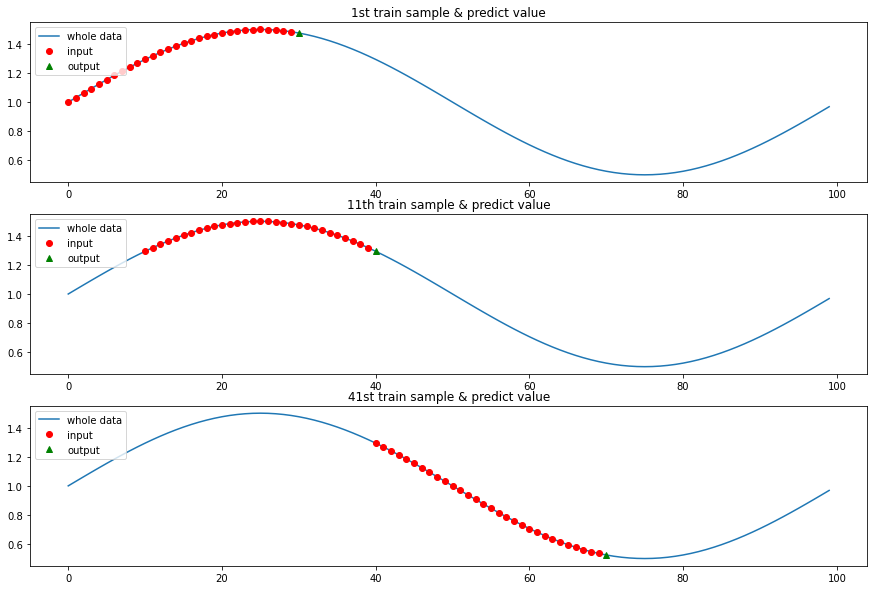

In [29]:
# traing data 확인
plt.figure(figsize=(15, 10),frameon=False)    

# 첫번째 input sample 30개(0~29), output sample 1개(31번째 output)
i= 0  
plt.subplot(311)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i ), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("1st train sample & predict value" )

# 11번째 input sample 30개(10~39), output sample 1개(41번째 output)
i= 10
plt.subplot(312)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("11th train sample & predict value" )

# 41번째 input sample 30개(40~69), output sample 1개(71번째 output)
i= 40
plt.subplot(313)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("41st train sample & predict value" )

plt.show()

#### 4) 신경망 정의
- 심층 신경망을 만들기위해 Sequential 객체인 model을 정의하고 층층이 쌓는다.

In [30]:
# 4. 신경망 정의
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))  # 과적합 방지
model.add(Dense(num_classes))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


#### 5) 모델 학습과정 설정
- loss = mse 사용
- optimizer = adam optimazer 사용

In [31]:
# 5. 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

#### 6) 모델학습
- 미리 split 해둔 validataion data 사용

In [32]:
# 6. 모델 학습
hist = model.fit(x_train, y_train, epochs=training_cnt, batch_size=batch_size, 
                 validation_data=(x_val, y_val),verbose=0)


- matplotlib을 사용하여 학습하면서 줄어드는 loss 나타내기

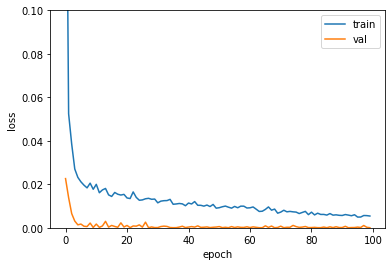

In [33]:
# 학습과정 Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### 7) 모델평가
- evaluate 사용하여 각각의 데이터셋의 loss 평가

In [34]:
# 7. 모델 평가
trainLoss = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Loss: ', trainLoss)
valLoss = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Loss: ', valLoss)
testLoss = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Loss: ', testLoss)

Train Loss:  6.26752371317707e-05
Validataion Loss:  5.651023457176052e-05
Test Loss:  5.651023457176052e-05


#### 8) 예측모델 비교
- 예측하여 만들어진 데이터와 실제데이터를 비교

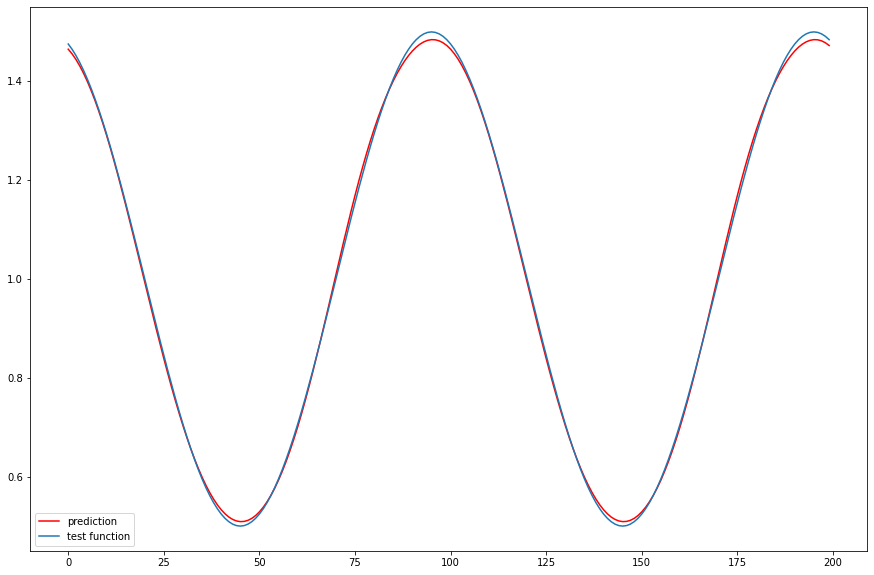

In [35]:
# 8. 예측모델 비교
time_ahead = 200
predictions = np.zeros((time_ahead,1))
for i in range(time_ahead):
    prediction = model.predict(np.array([x_test[i]]))
    predictions[i] = prediction
    
plt.figure(figsize=(15,10))
plt.plot(np.arange(time_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(time_ahead),y_test[:time_ahead],label="test function")
plt.legend()
plt.show()